In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

This e-commerce dataset includes user interactions with products, featuring columns for UserID, ProductID, Rating, and Timestamp, capturing user preferences and activity over time. Additionally, it contains Product Description, providing textual details about each product for content-based analysis.

In [2]:
df = pd.read_excel('Ecommerce.xlsx')
df.head()

,UserId,ProductId,Rating,Timestamp,product_description
0,A39HTATAQ9V7YF,205616461,5,1369699200,"Not only do angles make joints stronger, they ..."
1,A3JM6GV9MNOF9X,558925278,3,1355443200,BEHR Premium Textured DECKOVER is an innovativ...
2,A1Z513UWSAAO0F,558925278,5,1404691200,Classic architecture meets contemporary design...
3,A1WMRR494NWEWV,733001998,4,1382572800,The Grape Solar 265-Watt Polycrystalline PV So...
4,A3IAAVS479H7M7,737104473,1,1274227200,Update your bathroom with the Delta Vero Singl...


In [3]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'] ,unit='ms')
df.head()

,UserId,ProductId,Rating,Timestamp,product_description
0,A39HTATAQ9V7YF,205616461,5,1970-01-16 20:28:19.200,"Not only do angles make joints stronger, they ..."
1,A3JM6GV9MNOF9X,558925278,3,1970-01-16 16:30:43.200,BEHR Premium Textured DECKOVER is an innovativ...
2,A1Z513UWSAAO0F,558925278,5,1970-01-17 06:11:31.200,Classic architecture meets contemporary design...
3,A1WMRR494NWEWV,733001998,4,1970-01-17 00:02:52.800,The Grape Solar 265-Watt Polycrystalline PV So...
4,A3IAAVS479H7M7,737104473,1,1970-01-15 17:57:07.200,Update your bathroom with the Delta Vero Singl...


In [4]:
df.shape

(29452, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29452 entries, 0 to 29451
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   UserId               29452 non-null  object        
 1   ProductId            29452 non-null  object        
 2   Rating               29452 non-null  int64         
 3   Timestamp            29452 non-null  datetime64[ns]
 4   product_description  29452 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

UserId                 0
ProductId              0
Rating                 0
Timestamp              0
product_description    0
dtype: int64

In [7]:
df.duplicated().sum()

0

**Content-Based Filtering:**

A content-based recommendation engine looks at product descriptions to find items with similar features. It recommends products that match what the user likes based on their past choices.









In [8]:
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['product_description'])

In [9]:
Similarity =  cosine_similarity(tfidf_matrix, tfidf_matrix)

In [10]:
def recommend_products(ProductId, Similarity, df,top_n):
    idx = df[df['ProductId'] == ProductId].index[0]
    sim_scores = list(enumerate(Similarity[idx]))
    sim_scores = sorted(sim_scores,key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    recommended = [df.iloc[i[0]]['ProductId'] for i in sim_scores]
    return recommended

In [11]:
random_productID = df['ProductId'].sample(n=1).iloc[0]
print('Product ID',random_productID)
recommended = recommend_products(random_productID,Similarity, df,3)
print('recommended products :', recommended)

Product ID B000068U49
recommended products : ['B00004U9V2', 'B00005TP3U', 'B00005IBW0']


**Collaborative Filtering:**

A collaborative filtering recommendation engine suggests products based on customer ratings. It identifies patterns in user preferences and recommends items liked by similar users.

In [12]:
ratings = df.groupby('ProductId')['Rating'].agg(['mean','count']).sort_values(by='count',ascending=False)
ratings.head(10)

,mean,count
ProductId,,
B00006IV2F,4.343750,704
B0000632EN,3.978134,686
B00005O0MZ,4.082051,585
B0000530ED,3.522260,584
B00004TUBL,4.634409,558
B0000536P4,3.970588,442
B00005A9WP,3.879070,430
B000052YM7,4.196602,412
B000050B6U,4.175066,377


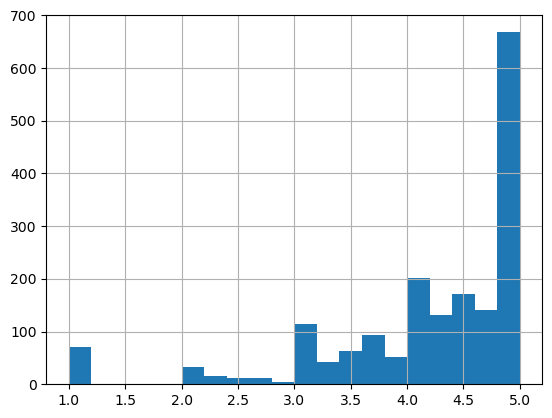

In [13]:
ratings['mean'].hist(bins = 20)
plt.show()

In [14]:
df.nunique()

UserId                 27927
ProductId               1829
Rating                     5
Timestamp               3772
product_description    28125
dtype: int64

In [15]:
matrix = df.pivot_table(index = 'UserId', columns = 'ProductId', values = 'Rating',fill_value=0)
matrix.head()

ProductId,1304139212,1304139220,130414089X,130414643X,1304146537,130414674X,1304168522,1304174778,1304174867,1304174905,...,B000078CXL,B000078CXM,B000078CXN,B000078CXO,B000078PN3,B000079XVD,B00007BGDU,B00007D07S,B00007D07T,B00007D07U
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A00473363TJ8YSZ3YAGG9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A01437583CZ7V02UKZQ5S,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A01907982I6OHXDYN5HD6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A020135981U0UNEAE4JV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
def recommend(ProductID,topn):
  product_ratings = matrix[ProductID]
  similar_products = matrix.corrwith(product_ratings)
  recommended_products = pd.DataFrame(similar_products,columns = ['Correlation'])
  recommended_products.dropna(inplace = True)
  recommended_productsID = recommended_products.sort_values('Correlation',ascending = False)
  return recommended_productsID.iloc[1:topn+1].index.tolist()

In [17]:
random_productID = df['ProductId'].sample(n=1).iloc[0]
print('Product ID',random_productID)
recommended_cf = recommend(random_productID,3)
print('Recommented Products :',recommended_cf)

Product ID 978807328X
Recommented Products : ['B000052Y28', '974383785X', 'B000062U5D']
